Display the simulation with matplotlib

In [1]:
# display matplotlib figures inline

%matplotlib inline

In [2]:
# import dependencies

from display import *
from IPython.display import clear_output
from time import sleep
from PIL import Image
import os

In [7]:
def display(rule, **kwargs):    
    """plot the simulation"""
    plt.figure()
    
    while True:
        gen, vid_gen, run, paint_list = main_loop(rule, **kwargs)
        if run:
            plt.imshow(rule.grid, cmap='inferno', vmin=0, vmax=(len(rule.states) - 1)) # change cmap for different color map
            if vid_gen > 0:
                filename = 'temp_image' + str(vid_gen) + '.png'
                plt.imsave(temp_dir / filename, rule.grid, cmap='inferno', vmin=0, vmax=(len(rule.states) - 1))
                im = Image.open(temp_dir / filename)
                im = im.resize((rule.width * rule.pixel, rule.height * rule.pixel), resample=0)
                im.save(temp_dir / filename)
            plt.show()
            print(gen)
            sleep(0.1)
            clear_output(wait=True)
        elif run == False:
            break

In [13]:
# settings for the run

height = 1000
width = 1000
rule = Anisotropic(height, width, fill=0.5, states=3)
setup(rule)

generating rule...
19683 transition rules generated!


In [9]:
# save rule to file

save_rule(rule, 'test', saves_dir)

exported rule to /home/user/cells/saves/test.cells


In [10]:
# import rule from file

arg = 'test'
path = saves_dir / (arg + '.cells')
file = shelve.open(str(path))
rule = globals()[file['name']](height, width, fill=0.5)
file.close()
setup(rule, imp=path)

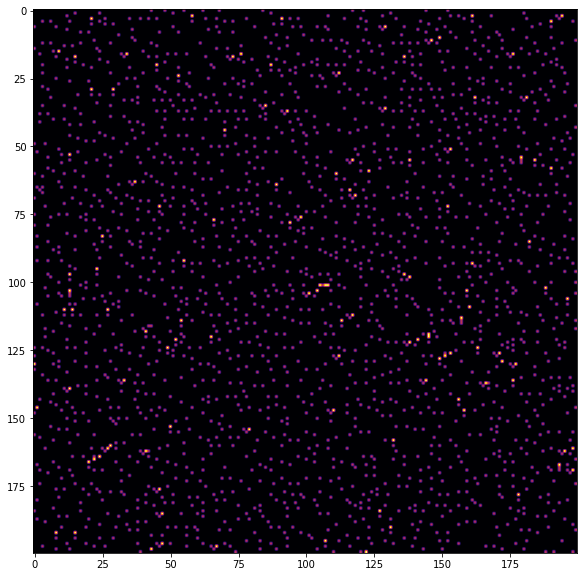

10


In [11]:
#display the simulation inline

temp_dir = Path.cwd() / 'temp'
makedir(temp_dir)
plt.rcParams['figure.figsize'] = [10, 10]
display(rule, maxgen=10)

In [15]:
#sample batch

samples = 5

export_batch = Path.cwd() / 'export' / 'batch'
saves_batch = Path.cwd() / 'saves' / 'batch'

makedir(export_batch)
makedir(saves_batch)

for i in range(samples):
    setup(rule)
    
    while True:
        gen, vid_gen, run, paint_list = main_loop(rule, maxgen=10)
        if run == False:
            filename = str(round(time.time()))
            save_rule(rule, filename, saves_batch)
            plt.imsave(export_batch / (filename + '.png'), rule.grid, cmap='inferno', vmin=0, vmax=(len(rule.states) - 1))
            #im = Image.open(export_dir / 'batch' / (filename + '.png'))
            #im = im.resize((rule.width * rule.pixel, rule.height * rule.pixel), resample=0)
            #im.save(export_dir / 'batch' / (filename + '.png'))
            break

generating rule...
19683 transition rules generated!
exported rule to /home/user/cells/saves/batch/1676323485.cells
generating rule...
19683 transition rules generated!
exported rule to /home/user/cells/saves/batch/1676323489.cells
generating rule...
19683 transition rules generated!
exported rule to /home/user/cells/saves/batch/1676323493.cells
generating rule...
19683 transition rules generated!
exported rule to /home/user/cells/saves/batch/1676323496.cells
generating rule...
19683 transition rules generated!
exported rule to /home/user/cells/saves/batch/1676323500.cells


In [ ]:
# compress results for download

!tar -czf export.tar.gz ./export/batch
!tar -czf saves.tar.gz ./saves/batch